# Домашнее задание №1: "Валидация рекомендательных систем"

Правила заполнения ноутбуков на авто-проверку:
- повторить окружение преподавателя. Проверка будет проходить в окружении с python 3.10
```bash
pip install pandas==2.2.3 numpy==1.26.4
```
- писать код только в ячейках с пометкой # YOUR CODE HERE, сразу после этой пометки
- не менять код преподавателя
- не добавлять новые импорты
- не добавлять новые ячейки
- следить, чтобы не было warning - они автоматом фейлят задание
- перед сдачей проверить, что весь ноутбук прогонятся от начала до конца и все тесты проходят

**Важно: в заданиях есть скрытые тесты**

In [2]:
# !{sys.executable} -m pip install pandas==2.2.3 numpy==1.26.4
!python -V


## !!!!!!!!!!!!!!!!!! ##

# Python 3.12.4 - использую kernel в Jupiter Notebook с Python 3.10, Python 3.12.4 - системная версия Python.

# import sys
# print(sys.version)
# 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]

Python 3.12.4


In [3]:
# Убедитесь, что вы не добавляете новые импорты в ноутбук. Решение должно быть ограничено данными библиотеками

import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import time
print(pd.__version__)
print(np.__version__)

2.2.3
1.26.4


## Кейс 1. Олд-скульный тест на математику (8 баллов)

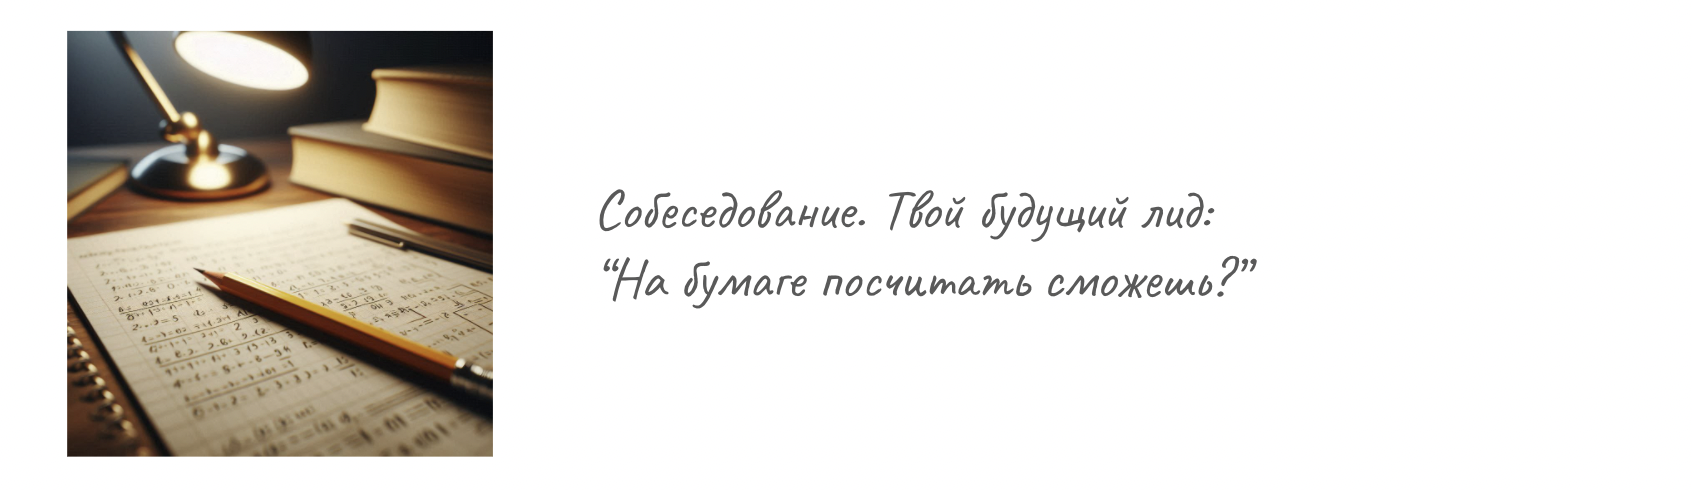

Перед тобой топ 5 рекомендаций от обученного алгоритма для 3-х тестовых юзеров в раскраске позитивам / негативам. У каждого тестового юзера было ровно 2 ground truth интеракции в тестовом периоде. Оранжевые кружки - это айтемы, с которыми юзер взаимодействовал в тестовом периоде, белые - с которыми не взаимодействовал.

Твоя задача - посчитать метрики для оценки качества алгоритма. Сторонние библиотеки для расчёта метрик или код с семинара использовать не стоит - в ранжирующих метриках бывают различия в логике расчётов (см. notes в шпаргалке). Ориентируйся только на формулы в ноутбуке, чтобы ответ сошёлся.
В этом задании лучше не писать универсальные функции для получения ответа, а посчитать на конкретном примере вручную.

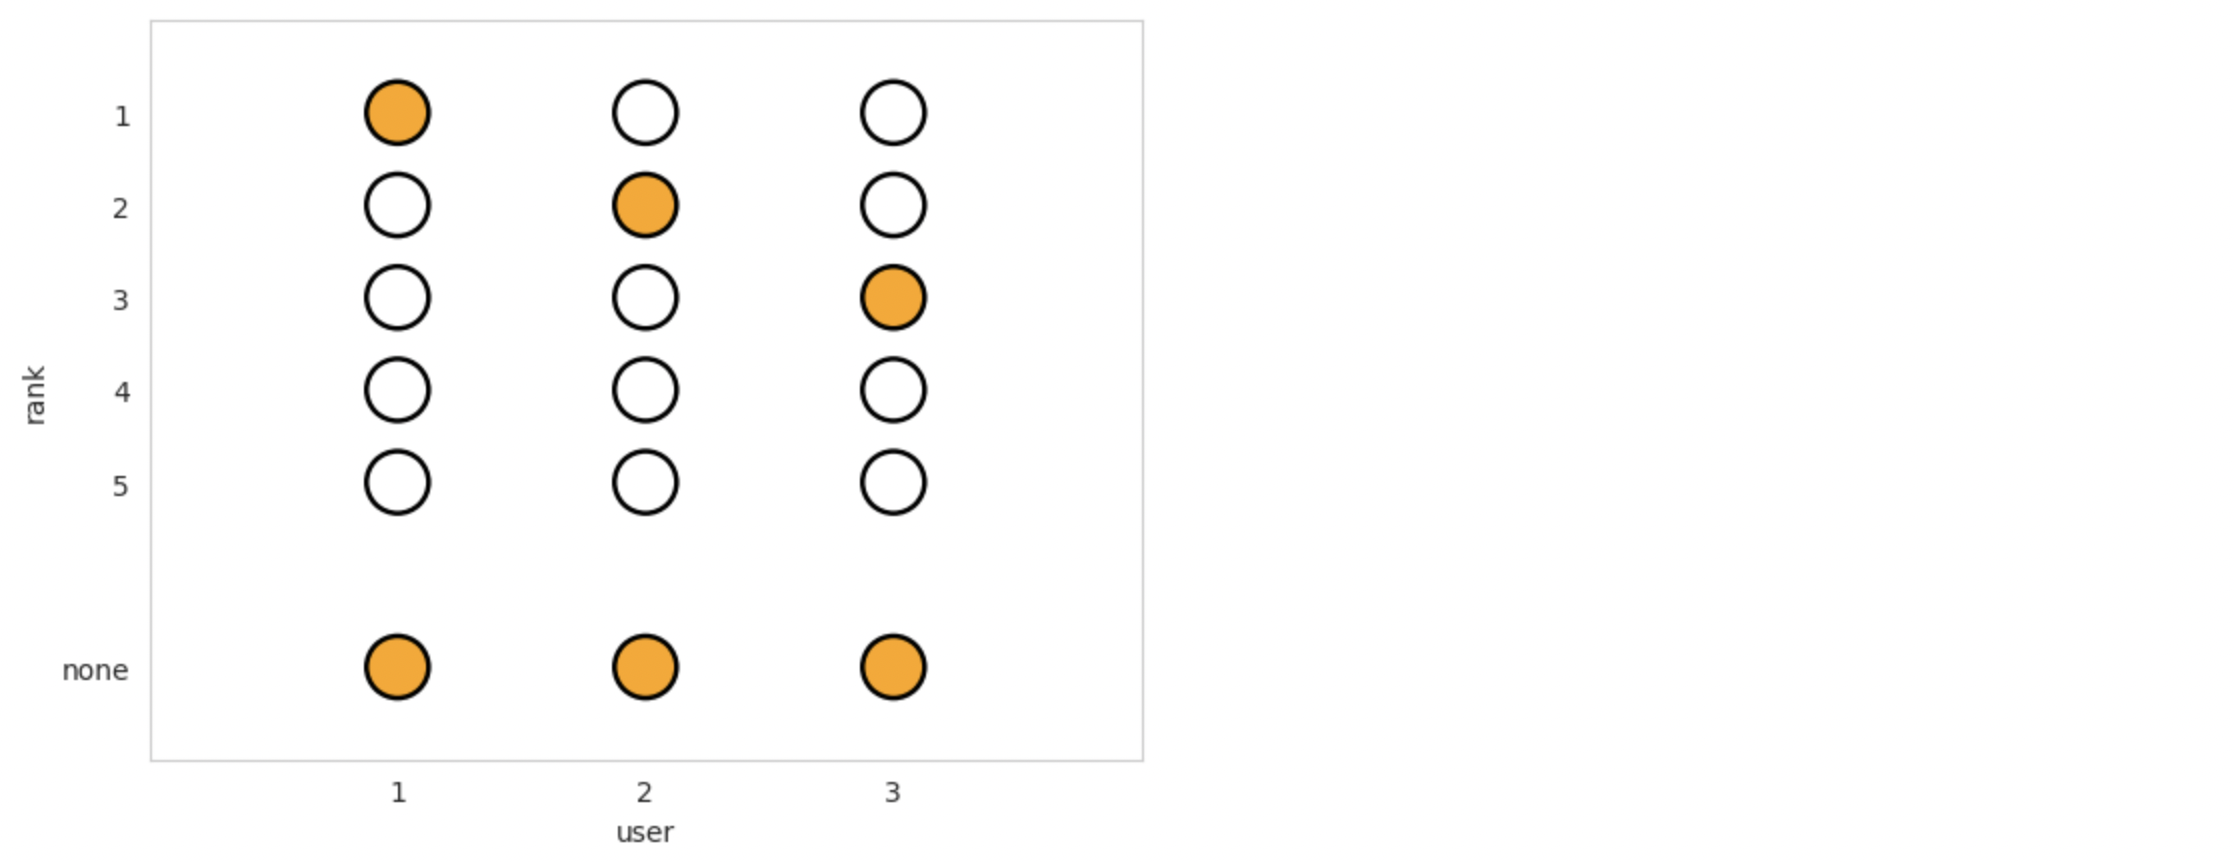

Твоя шпаргалка:

-----

${Precision@k} =  \frac{1}{|U|}\sum_{u \in U}\frac{1}{k}\sum_{i=1}^{k} rel_u(i)$

-----

${Recall@k} =  \frac{1}{|U|}\sum_{u \in U}\frac{1}{|R_u|}\sum_{i=1}^{k} rel_u(i)$

-----

$MAP@k = \frac{1}{|U|}\sum_{u \in U}AP_u@k$

$AP_u@k = \frac{1}{k}(\sum_{i=1}^{k} Precision@i * rel_u(i))$

-----

$NDCG@k=\frac{1}{|U|}\sum_{u \in U}\frac{DCG_u@k}{IDCG_u@k}$

$DCG_u@k = \sum_{i=1}^{k} \frac{rel_u(i)}{log_2(i + 1)}$

$IDCG_u@k = \sum_{i=1}^{\min (|R_u|, k)} \frac{1}{log_2(i + 1)}$

-----

- $rel_u(i)$ is an indicator function, it equals to $1$ if the item at rank $i$ is relevant to user $u$, $0$ otherwise
- $|R_u|$ is number of relevant (ground truth) items for user $u$

-----

Note: $AP_u@k$ is not always divided by $k$, sometimes $|R(u)|$ or $min(|R_u|,k)$ is used instead

Note: $IDCG_u@k$ is not always summed for $min(|R_u|,k)$, sometimes $k$ is used instead

In [9]:
# Классификационные метрики: каждый правильный ответ даёт 1 балл

# Далее я постараюсь дать подробные расчеты для метрик, учитывая значения каждой переменной

def precision_at_1() -> float:
    # YOUR CODE HERE

    # число пользователей
    u = 3
    # количество топ-реков
    k = 1
    # сумма по бинарным меткам релевантности
    rel_1 = 1
    rel_2 = 0
    rel_3 = 0

    precision_k_1 = (rel_1 / k + rel_2 / k + rel_3 / k) / u
    ans = precision_k_1
    
    # raise NotImplementedError()
    return ans

def precision_at_5() -> float:
    # YOUR CODE HERE

    # число пользователей
    u = 3
    # количество топ-реков
    k = 5
    # сумма по бинарным меткам релевантности
    rel_1 = 1
    rel_2 = 1
    rel_3 = 1

    precision_k_5 = (rel_1 / k + rel_2 / k + rel_3 / k) / u
    ans = precision_k_5
    
    # raise NotImplementedError()
    return ans

def recall_at_1() -> float:
    # YOUR CODE HERE

    # число пользователей
    u = 3
    # количество топ-реков
    k = 1

    rel_1 = 1
    rel_2 = 0
    rel_3 = 0
    
    # важно! включаю общее число ground truth

    r_u_1 = rel_1 / 2
    r_u_2 = rel_2 / 2
    r_u_3 = rel_3 / 2

    recall_k_1 = (r_u_1 + r_u_2 + r_u_3) / u
    
    ans = recall_k_1
    # raise NotImplementedError()
    return ans

In [10]:
# Ранжирующие метрики: каждый правильный ответ даёт 1 балл

# AveragePrecision@3 для юзера `2`
def ap_at_3_for_user_2() -> float:
    # YOUR CODE HERE

    # количество топ-реков
    k = 3

    precision_k_1 = (0 / 1) * 0
    precision_k_2 = (1 / 2) * 1
    precision_k_3 = (1 / 3) * 0

    
    precision_k_n = precision_k_1 + precision_k_2 + precision_k_3
    
    ap_at_3_for_user_2 = (1 / k) * precision_k_n

    ans = ap_at_3_for_user_2
    
    # raise NotImplementedError()
    return ans

# MeanAveragePrecision@3
def map_at_3() -> float:
    # YOUR CODE HERE
    # количество топ-реков
    k = 3
    precision_k_1 = (0 / 1) * 0
    precision_k_2 = (1 / 2) * 1
    precision_k_3 = (1 / 3) * 0
    
    precision_k_n = precision_k_1 + precision_k_2 + precision_k_3
    
    ap_at_3_for_user_2 = 1 / k * precision_k_n
    #
    precision_k_1 = (1 / 1) * 1
    precision_k_2 = (1 / 2) * 0
    precision_k_3 = (1 / 3) * 0
    precision_k_n = precision_k_1 + precision_k_2 + precision_k_3
    #
    ap_at_3_for_user_1 = 1 / k * precision_k_n
    #
    precision_k_1 = (0 / 1) * 0
    precision_k_2 = (0 / 2) * 0
    precision_k_3 = (1 / 3) * 1
    precision_k_n = precision_k_1 + precision_k_2 + precision_k_3
    #
    ap_at_3_for_user_3 = 1 / k * precision_k_n

    map_k = 1 / 3 * (ap_at_3_for_user_1 + ap_at_3_for_user_2 + ap_at_3_for_user_3)
    ans = map_k
    # raise NotImplementedError()
    return ans

# DiscountedCumulativeGain@3 для юзера `2`
def dcg_at_3_for_user_2() -> float:
    # YOUR CODE HERE

    dcg_at_3_for_user_2 = 0 / np.log2(1 + 1) + 1 / np.log2(2 + 1) + 0 / np.log2(3 + 1)
    ans = dcg_at_3_for_user_2
    
    # raise NotImplementedError()
    return ans

# IdealDiscountedCumulativeGain@3 для юзера `2`
def idcg_at_3_for_user_2() -> float:
    # YOUR CODE HERE
    idcg_at_3_for_user_2 = 1 / np.log2(1 + 1) + 1 / np.log2(2 + 1)
    ans = idcg_at_3_for_user_2
    # raise NotImplementedError()
    return ans

# NormalizedDiscountedCumulativeGain@3
def ndcg_at_3() -> float:
    # YOUR CODE HERE
    u = 3
    dcg_at_3_for_user_1 = 1 / np.log2(1 + 1) + 0 / np.log2(2 + 1) + 0 / np.log2(3 + 1)
    dcg_at_3_for_user_2 = 0 / np.log2(1 + 1) + 1 / np.log2(2 + 1) + 0 / np.log2(3 + 1)
    dcg_at_3_for_user_3 = 0 / np.log2(1 + 1) + 0 / np.log2(2 + 1) + 1 / np.log2(3 + 1)
    #
    idcg_at_3_for_user_1 = 1 / np.log2(1 + 1) + 1 / np.log2(2 + 1) 
    idcg_at_3_for_user_2 = 1 / np.log2(1 + 1) + 1 / np.log2(2 + 1)
    idcg_at_3_for_user_3 = 1 / np.log2(1 + 1) + 1 / np.log2(2 + 1)
    #
    ndcg_at_3 = 1 / u * (dcg_at_3_for_user_1 / idcg_at_3_for_user_1 
                    + dcg_at_3_for_user_2 / idcg_at_3_for_user_2 
                    + dcg_at_3_for_user_3 / idcg_at_3_for_user_3)
    ans = ndcg_at_3
    # raise NotImplementedError()
    return ans

### Проверка решений
При проверке преподавателем объём тестов будет расширен

In [12]:
# Проверяем классификационные метрики
# Правильный ответ даёт 1 балл

assert isinstance(precision_at_1(), float)


In [13]:
# Проверяем классификационные метрики
# Правильный ответ даёт 1 балл

assert isinstance(precision_at_5(), float)


In [14]:
# Проверяем классификационные метрики
# Правильный ответ даёт 1 балл

assert isinstance(recall_at_1(), float)


In [15]:
# Проверяем Average Precision (ap_at_3_for_user_2)
# Правильный ответ даёт 1 балл

assert isinstance(ap_at_3_for_user_2(), float)


In [16]:
# Проверяем Mean Average Precision (map_at_3)
# Правильный ответ даёт 1 балл

assert isinstance(map_at_3(), float)


In [17]:
# Проверяем Discounted Cumulative Gain (dcg_at_3_for_user_2)
# Правильный ответ даёт 1 балл

assert isinstance(dcg_at_3_for_user_2(), float)


In [18]:
# Проверяем Ideal Discounted Cumulative Gain (idcg_at_3_for_user_2)
# Правильный ответ даёт 1 балл

assert isinstance(idcg_at_3_for_user_2(), float)


In [19]:
# Проверяем Normalized Discounted Cumulative Gain (ndcg_at_3)
# Правильный ответ даёт 1 балл

assert isinstance(ndcg_at_3(), float)


## Кейс 2. Имплементация взвешенного Recall (12 баллов)

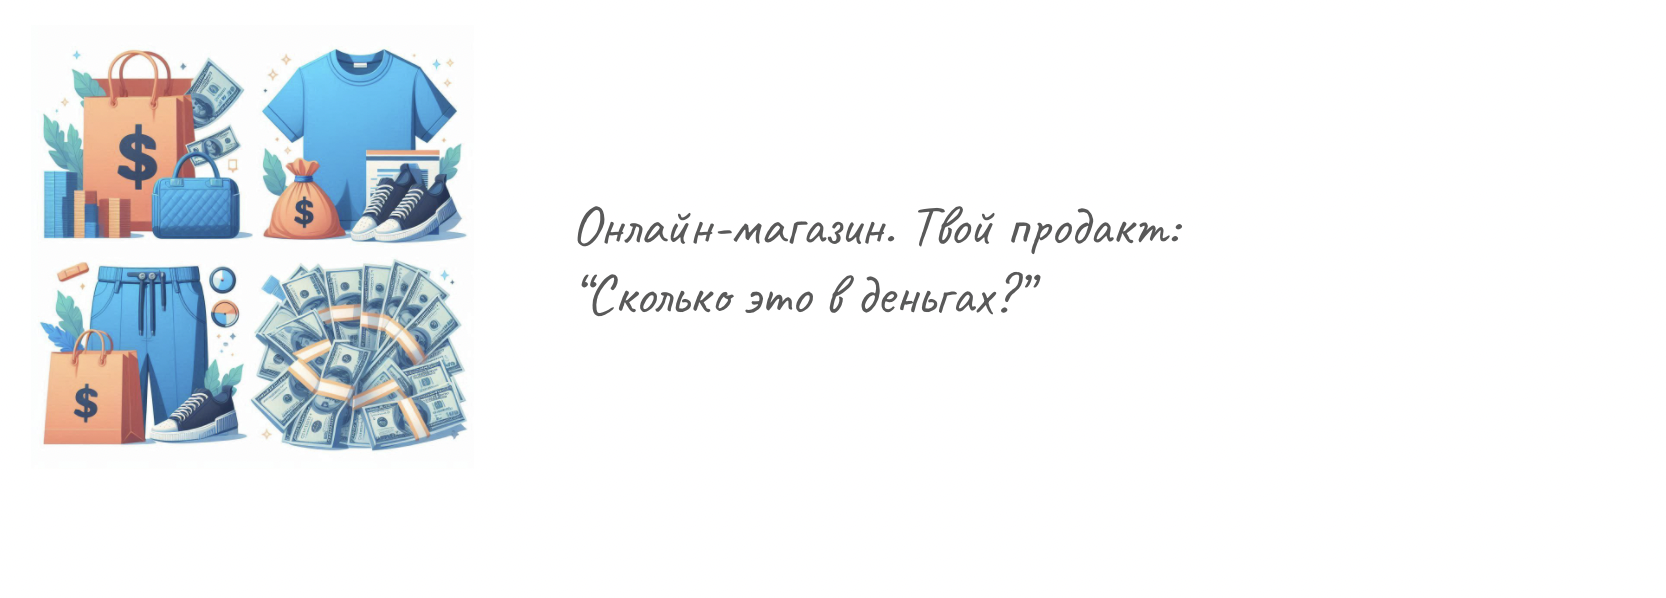

Ты разрабатываешь полку с персональными рекомендациями в интернет-магазине. 
Качество рекомендаций важно оценивать в деньгах.
Имплементируй функцию, которая рассчитывает взвешенный Recall на основе рекомендаций модели и реальных покупок пользователей.

Метрика усреднена по юзерам и идентична обычному Recall, но релеватность айтема для юзера оценивает не в бинарном виде (hit / miss), а в денежном. Какую долю реально потраченных пользователями денег, в среднем умеет предсказывать модель?

In [23]:
# Отранжированные рекомендации товаров, полученные из обучения алгоритма на исторических данных

top_k = 5
n_users = 3
reco = pd.DataFrame({
    "user_id": np.repeat(np.arange(n_users), top_k),
    "item_id": np.tile(np.arange(top_k), n_users),
})
reco["rank"] = reco.groupby("user_id").cumcount() + 1
reco

,user_id,item_id,rank
0,0,0,1
1,0,1,2
2,0,2,3
3,0,3,4
4,0,4,5
5,1,0,1
6,1,1,2
7,1,2,3
8,1,3,4
9,1,4,5


In [24]:
# Реальные покупки пользователей в тестовом периоде

test = pd.DataFrame({
    "user_id": [0, 1, 2, 0, 1, 2],
    "item_id": [0, 1, 2, 3, 4, 5],
    "money": [100, 200, 100, 200, 100, 500]
})
test

,user_id,item_id,money
0,0,0,100
1,1,1,200
2,2,2,100
3,0,3,200
4,1,4,100
5,2,5,500


Имплементируйте функцию для расчёта взвешенного Recall. Помните, что метрика сначала считается для каждого юзера, а потом усредняется для получения финального значения.  
Вспомните подходы с семинара, которые позволяют рассчитывать метрики в векторном виде.  
Корректная, но неэффективная имплементация даст 2 балла из 5.  
Корректная и эффективная - 5 из 5.

In [26]:
def weighted_recall(reco: pd.DataFrame, test: pd.DataFrame, k: int, weight_col: str = "money") -> float:
    # YOUR CODE HERE
    '''
    Recall@k:
    
    $$
    Recall@k = \frac{1}{|U|} \sum_{u \in U} \frac{1}{|R_u|} \sum_{i=1}^{k} rel_u(i)
    $$

    weighted_recall:
        
    $$
    \text{Weighted Recall} = \frac{1}{|U|} \sum_{u \in U} 
    \frac{\sum_{i \in \text{top-}k \ \text{recos}} money(i, u) \cdot I(\text{reco})}
    {\sum_{i \in \text{all true purchases}} money(i, u)}
    $$
    '''
    reco_k = reco[reco['rank'] <= k].copy()
    
    reco_test = reco_k.merge(test, on=['user_id', 'item_id'], how='inner')
    
    weighted_hits = reco_test.groupby('user_id')[weight_col].sum()
    
    weighted_total = test.groupby('user_id')[weight_col].sum()
    
    user_weighted_recall = weighted_hits.reindex(weighted_total.index, fill_value=0) / weighted_total
    
    res = user_weighted_recall.mean()
    
    # raise NotImplementedError()
    return res

### Проверка решения
При проверке преподавателем объём тестов будет расширен

In [28]:
# Проверяем корректность расчётов
# Функция с корректными расчётами даёт 6 баллов
# Хардкод получит 0 баллов при проверке преподавателем

actual = weighted_recall(reco.copy(), test.copy(), k=5)
expected = (1 + 1 + 1 / 6) / 3
assert isinstance(actual, float)
assert abs(expected - actual) < 0.001

actual = weighted_recall(reco.copy(), test[test["user_id"]==0].copy(), k=5)
expected = 1
assert isinstance(actual, float)
assert abs(expected - actual) < 0.001


In [29]:
# Проверяем эффективность имплементации
# Эффективная имплементация в векторной форме с корректными расчётами даёт 6 баллов
# Хардкод получит 0 баллов при проверке преподавателем
# Наивная имплементация получит 0 баллов при проверке преподавателем

class Timer:        
    def __enter__(self):
        self._start = time.perf_counter()
        self._end = None
        return self

    def __exit__(self, *args):
        self._end = time.perf_counter()

    @property
    def elapsed(self):
        return self._end - self._start
    
    
with Timer() as timer:
    actual = weighted_recall(reco, test, k=5)
assert isinstance(actual, float)
assert timer.elapsed < 0.1


# Как сдать ноутбук на проверку
1. Прогоните весь код ноутбука - проверьте, что нет ошибок, весь код запускается и тесты проходят
2. Обязательно! Для кейса 2 проверьте, что ваш код будет корректно работать на новых данных
3. Приложите готовый ноутбук при сдаче домашнего задания

**Максимальная оценка: 20 баллов**